# Music for Plant Growth 
## Analyzing audio files
Rini Gupta, Jacinta Das, Kimya Shirazi


***



## Introduction

Our final project seeks to explore characteristics of music which could potentially be conducive to plant growth. To do this, we will examine "Baby's Tears Blues", a song from the album Mother Earth's Plantasia. Released in 1976, the electronic album by Mort Garson was specifically composed for plants to listen to (Paul, 2019). The song “Baby’s Tears Blues” was composed with a Moog synthesizer and is set to a jazzy swing beat with background synth which creates a cartoonish style more fitting for a plant audience (Paul, 2019). We will compare "Baby's Tears Blues" to another song to try to extract key differences which could make a difference in plant growth. We chose Queen’s “We Will Rock You” as the rock song comparison because of its strong beat, which contrasts well with “Baby’s Tears Blues."

There has been some research conducted on the effect of music on plants. Plant enthusiasts on Bloomscape wrote an interesting and informative article detailing the history of investigation into the topic. Dr. T.C. Singh at Annamalai University “exposed balsam plants to classical music and found that their growth rate increased by 20% compared to a control group, along with a 72% increase in biomass (Pink, 2021).” Although our project unfortunately will not be able to explore the effect of music on plants, it could uncover differences between the two chosen songs which could help researchers hypothesize effects on plants for future research on the topic.

## Objectives

The goal of this project is to apply time series analysis techniques on Baby’s Tears Blues and We Will Rock You in order to investigate potential differences between audio files which could contribute to or limit plant growth. Previous literature regarding the effect of music on plant growth favored jazz and classical music, whereas rock music was more likely to limit plant growth. We chose Baby’s Tears Blues and We Will Rock You as the song choices for comparison for a couple reasons. First, there is a striking opposition between the mellow jazz melody of Baby’s Tears Blues and the strong percussion & loud beats of We Will Rock You. Second, Baby’s Tears Blues is from the album “Mother Earth's Plantasia” because the album was designed to target a plant audience. 


Our first step is to install necessary packages. TuneR is an R Package for analyzing music and speech. Tswge is an R Package for time series analysis.

In [ ]:
install.packages("tuneR", dependencies = TRUE)
install.packages("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘pastecs’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘PolynomF’, ‘waveslim’, ‘astsa’




In [ ]:
library("tuneR")
library(tswge)

## Methodology 

We used a couple of R libraries for this project — specifically, we used the tuneR package and our textbook’s ‘tswge’ package. In order to download the audio files, we screen recorded our songs on Spotify and then converted the video to an MP3 file using an online resource. From there, we easily loaded the file into R using the tuneR package. This method of downloading the songs may have reduced the quality of the original audio, but we were still able to analyze the general trends using the tuneR and tswge library. We chose 15 second clips for the two songs in order to have a manageable amount of data to analyze. 

We used the code snippet provided for us to kickstart our analysis. We decided to isolate the right audio channel because doing so gave us the most interesting plots to look at. Throughout our project, we predominantly relied on visualizations to analyze the two songs and compare them to each other. Furthermore, we incorporated concepts from throughout the semester like frequency domain analysis through periodograms, filtering techniques, and plotting the autocorrelation/Parzen windows.


"We Will Rock you" is a popular song released by the British band Queen in 1977; it falls into the genre of rock. The song uses stomping and clapping throughout it to maintain a strong beat. It is two minutes two seconds long. 

https://en.wikipedia.org/wiki/We_Will_Rock_You

In [ ]:
# Read in "We Will Rock You"
my_mp3 <- readMP3('song2.mp3')
str(my_mp3)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:691200] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:691200] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 48000
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


"Baby's Tears Blues" is a jazz song from the album Mother Earth's Plantasia. The song is three minutes three seconds long.

In [ ]:
# Read in "Baby's Tears Blues"
my_mp3_2 <- readMP3('plants.mp3')
str(my_mp3_2)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:595584] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:595584] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


### **Summary Statistics**

** We used Spek to get the Hertz range

| Audio File | Number of Samples | Sampling Rate | Hertz Range |
        | ---------- | ------------------ | --------------- | ----------- |
        |We Will Rock You | 691200 | 0.24 | 0 - 24,000 | 
        |Baby's Tears Blues| 595584 | 0.23 | 0 - 22,050 |
     

In [ ]:
# Check audio length (convert seconds to minutes) of "We Will Rock You"
num_samples <- length(my_mp3@left)
num_samples / my_mp3@samp.rate / 60

[1] 0.24

In [ ]:
# Check audio length (convert seconds to minutes) of "Baby's Tears Blues"
num_samples2 <- length(my_mp3_2@right)
num_samples2 / my_mp3_2@samp.rate / 60

[1] 0.2250884

In [ ]:
cat("'We Will Rock You' Number of Samples:", num_samples)
cat("\n\n'Baby's Tears Blues' Number of Samples:", num_samples2)


'We Will Rock You' Number of Samples: 691200

'Baby's Tears Blues' Number of Samples: 595584

In [ ]:
# Pull only the right audio channel
s1 <- my_mp3@right

In [ ]:
# Pull only the right audio channel
s1_2 <- my_mp3_2@right

In [ ]:
m1 <- s1 / 2^(my_mp3@bit - 1)
# convert back before write it

In [ ]:
m1_2 <- s1_2 / 2^(my_mp3_2@bit - 1)

In [ ]:
my_time <- (0:(num_samples - 1)) / my_mp3@samp.rate

In [ ]:
my_time2 <- (0:(num_samples2 - 1)) / my_mp3_2@samp.rate

In [ ]:
length(my_time)
length(my_time2)

[1] 691200

[1] 595584

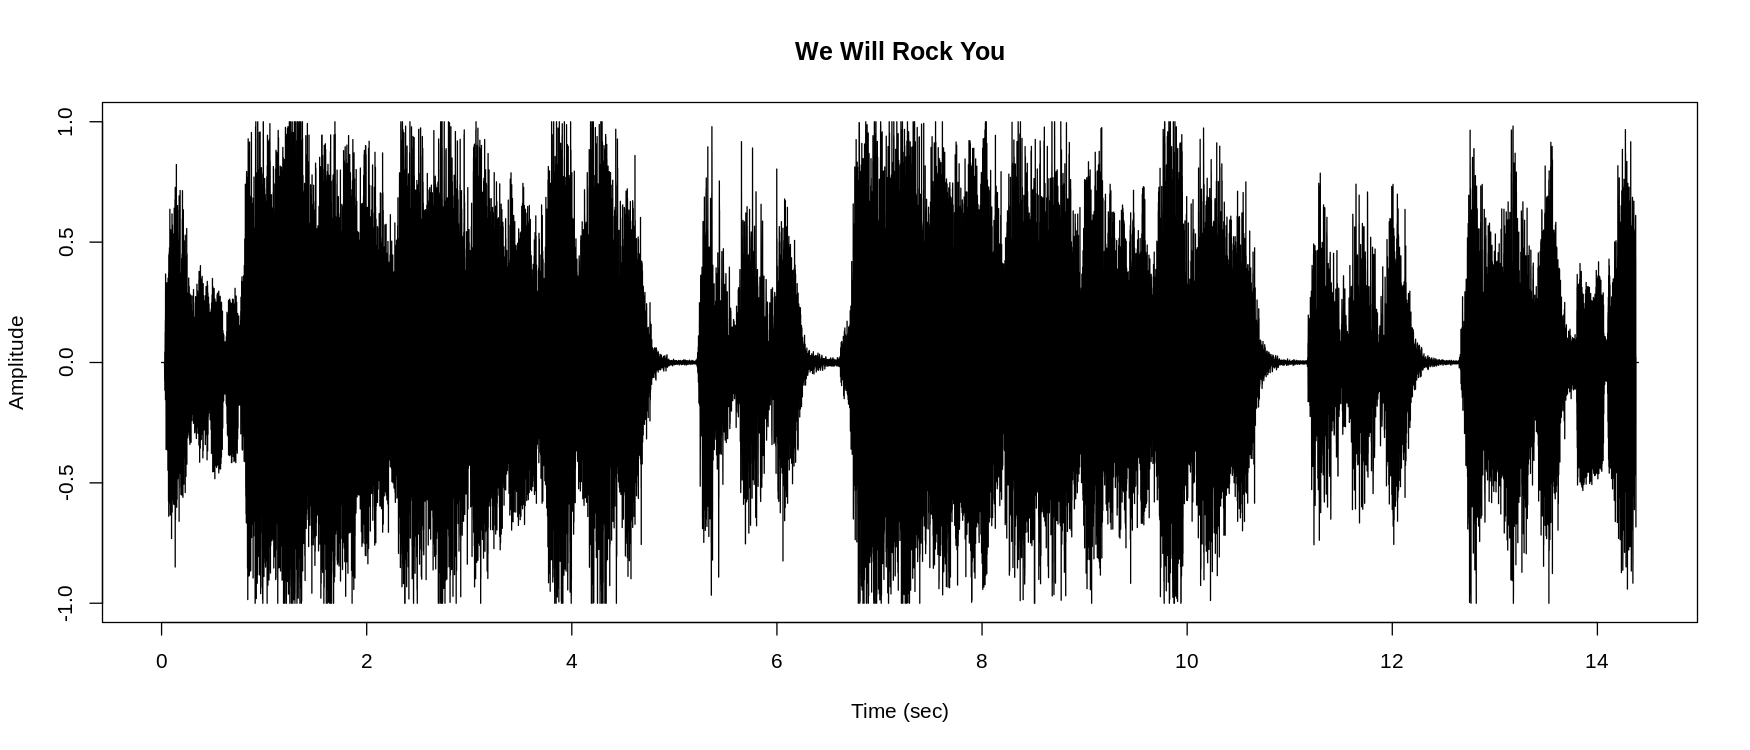

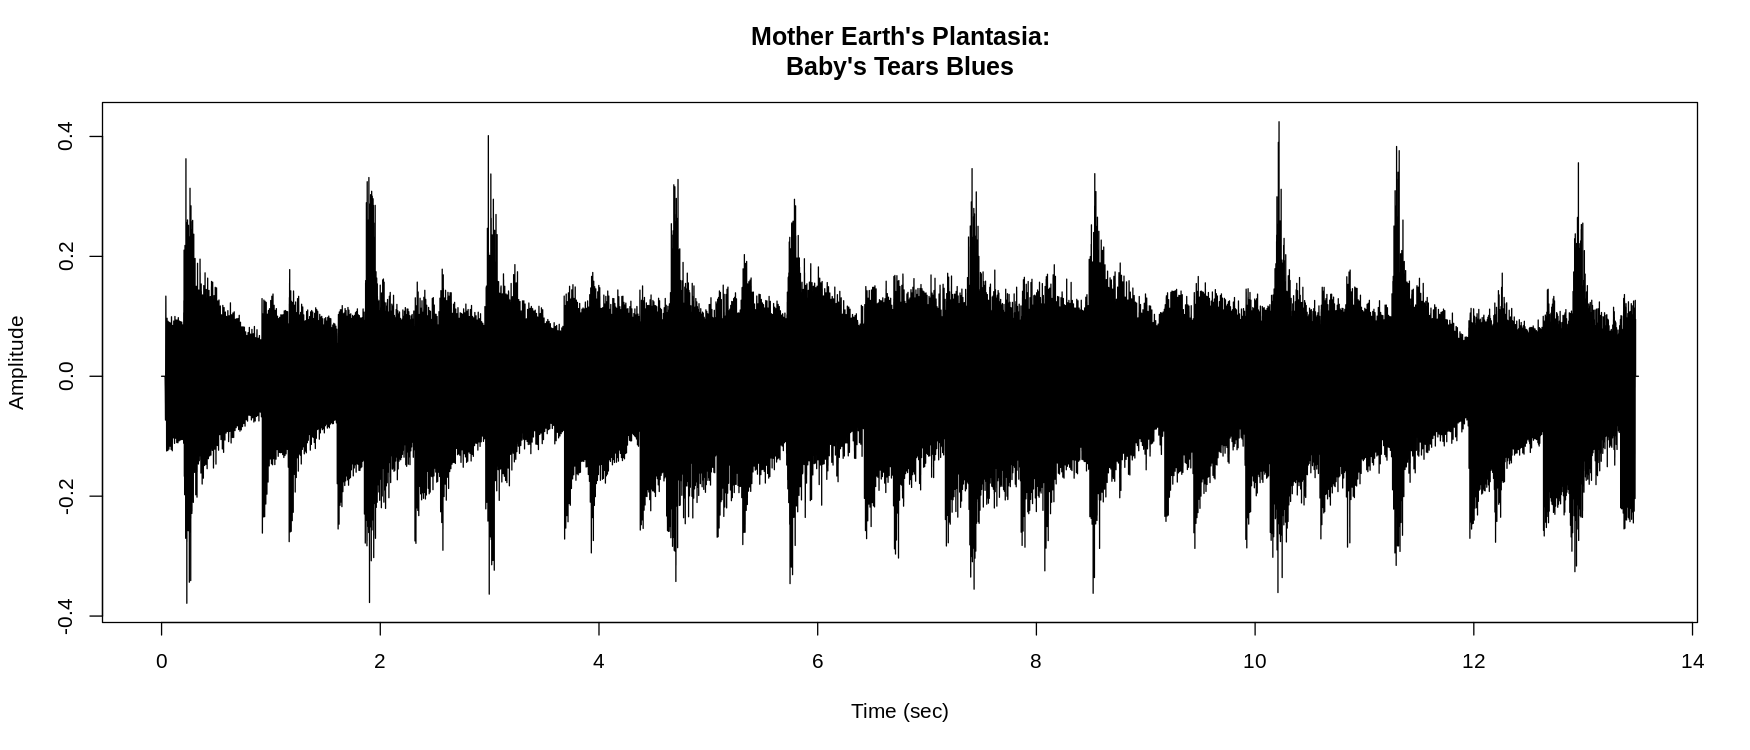

In [ ]:
# Entire song - We Will Rock You
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time, m1, type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = 'We Will Rock You')

# Entire song -- Baby's Tears Blues
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time2, m1_2, type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Mother Earth's Plantasia:\nBaby's Tears Blues")

## Filtering

We did some exploratory analysis with each of the types of filters we learned on both of our chosen songs. Some of the filters changed the data more and some did not prove to be very useful. Specifically, we tested a high-pass, low-pass, bandpass, and bandstop filter on our two songs.

"We Will Rock You"

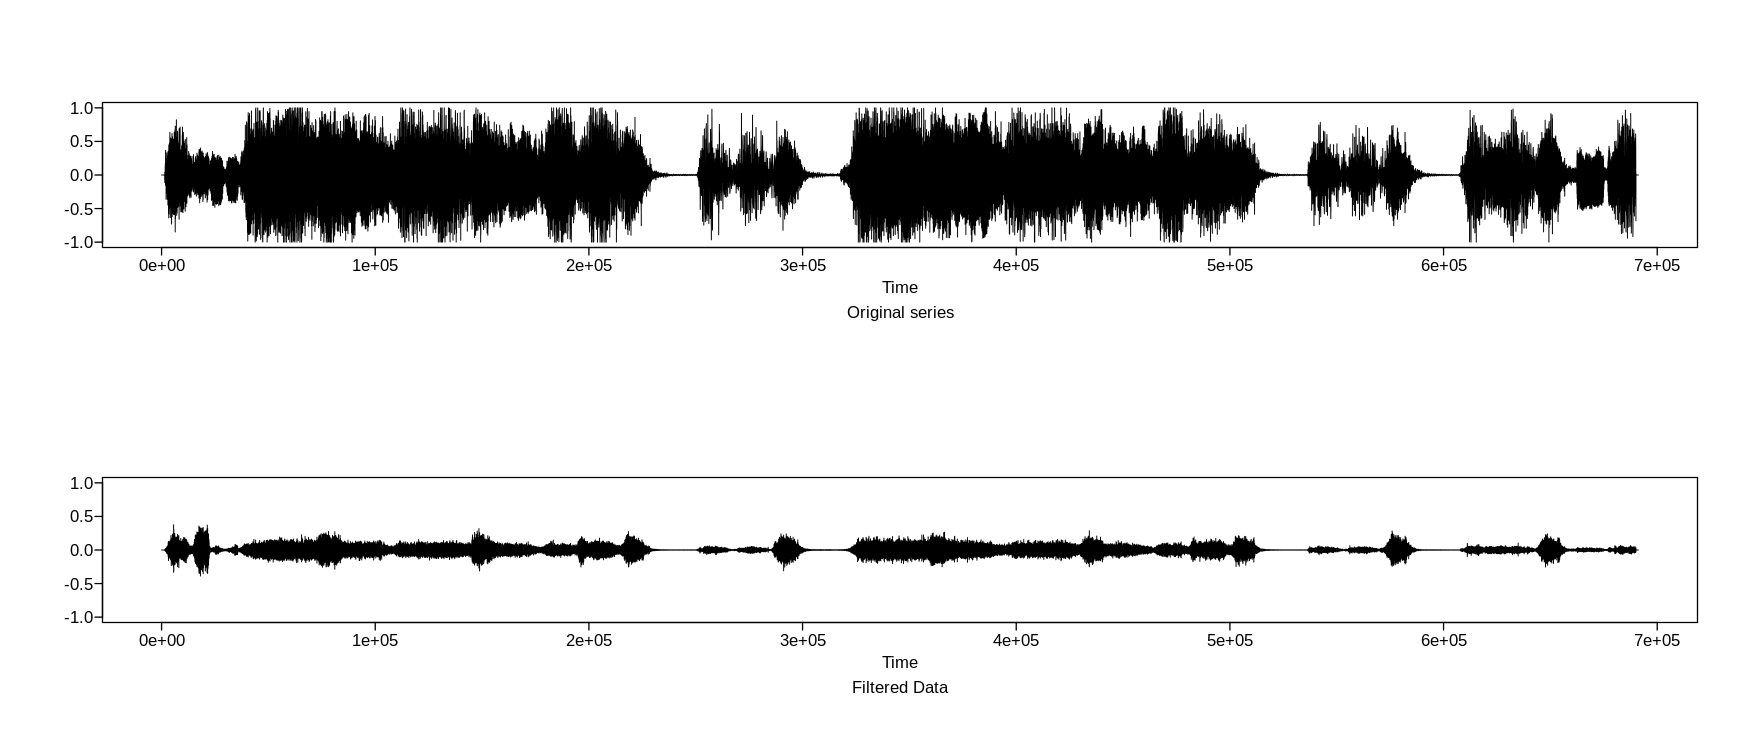

In [ ]:
high <- butterworth.wge(m1, order = 3, type = 'high', cutoff = .1)

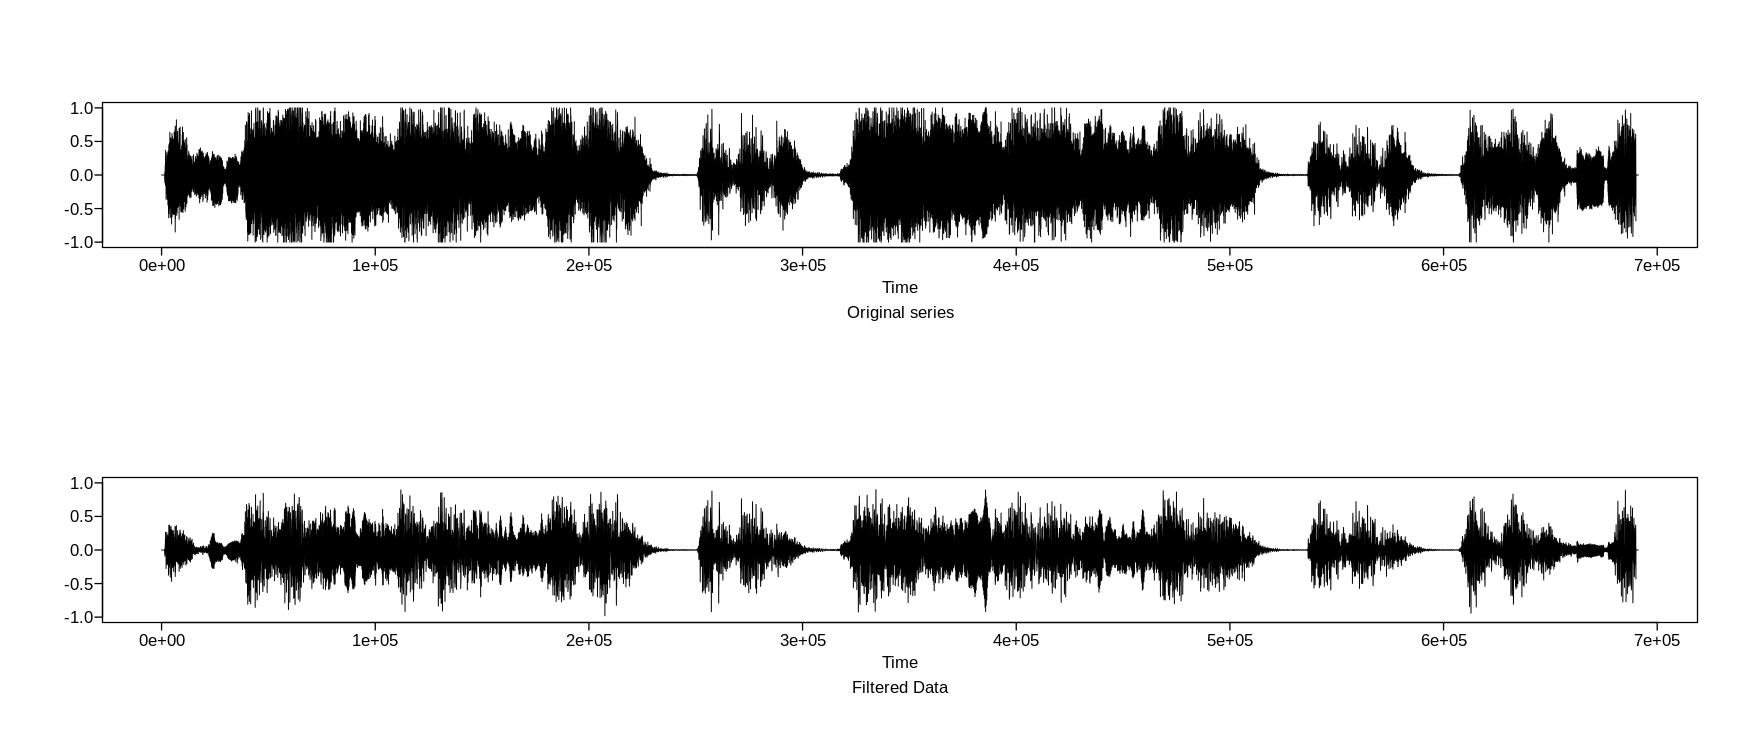

In [ ]:
low <- butterworth.wge(m1, order = 3, type = 'low', cutoff = .02)

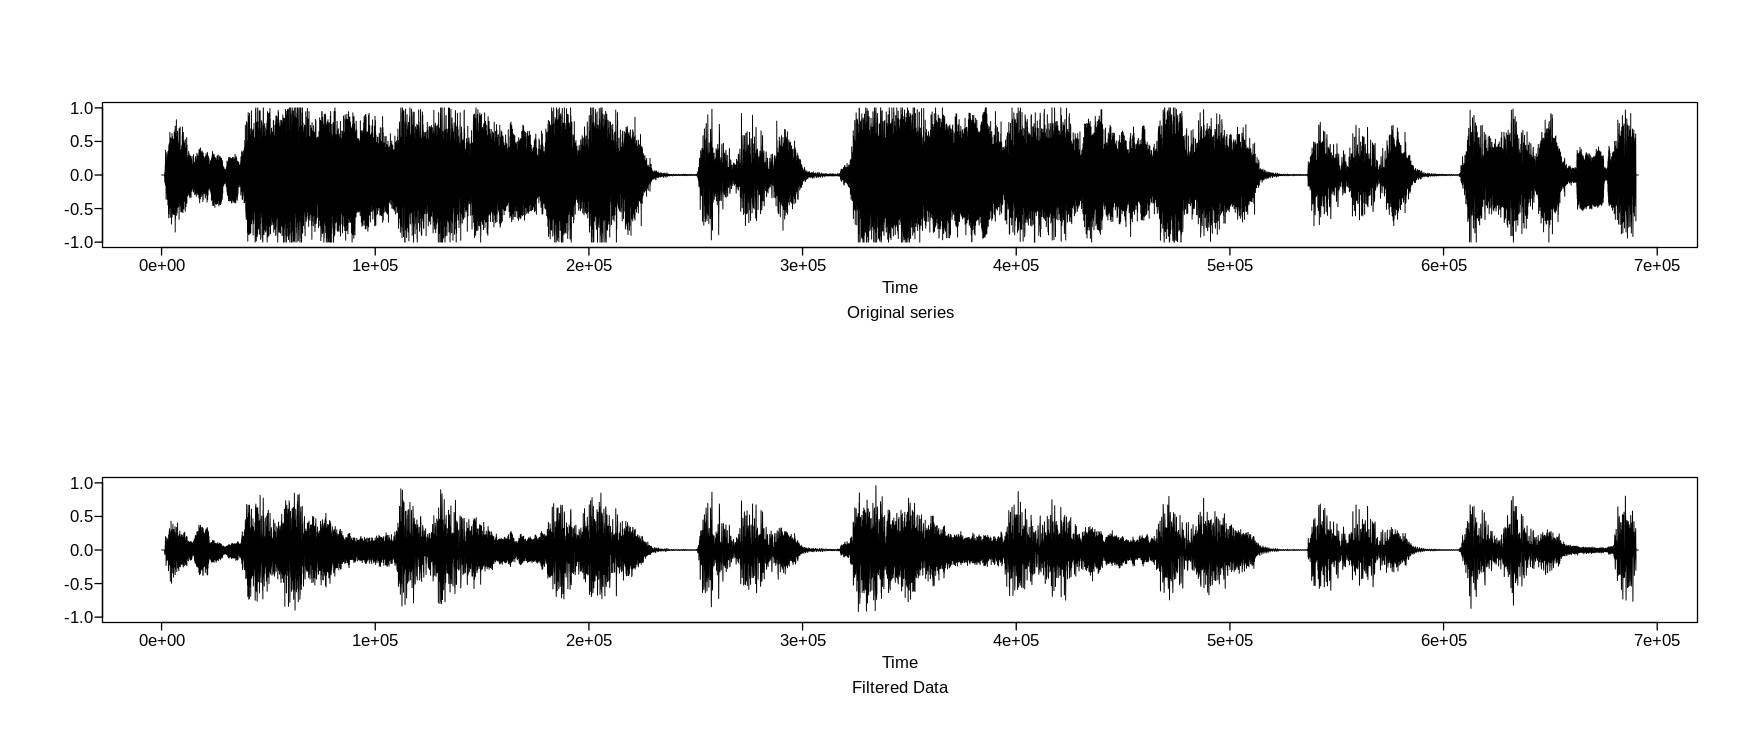

In [ ]:
stop <- butterworth.wge(m1, order = 3, type = 'stop', cutoff = c(.01, .1))

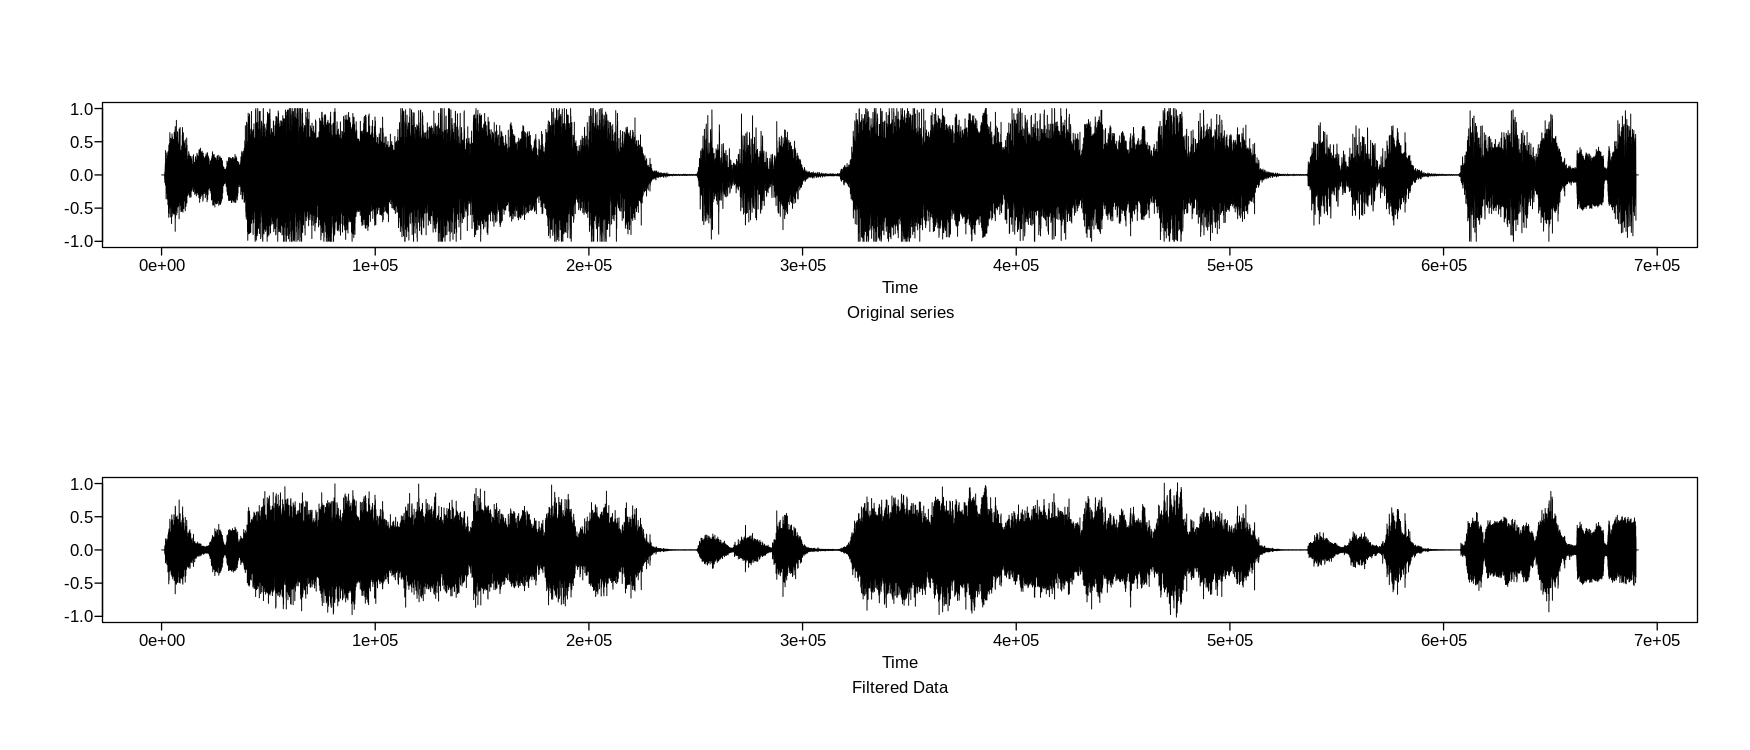

In [ ]:
pass <- butterworth.wge(m1, order = 3, type = 'pass', cutoff = c(.01, .1))

"Baby's Tears Blues"

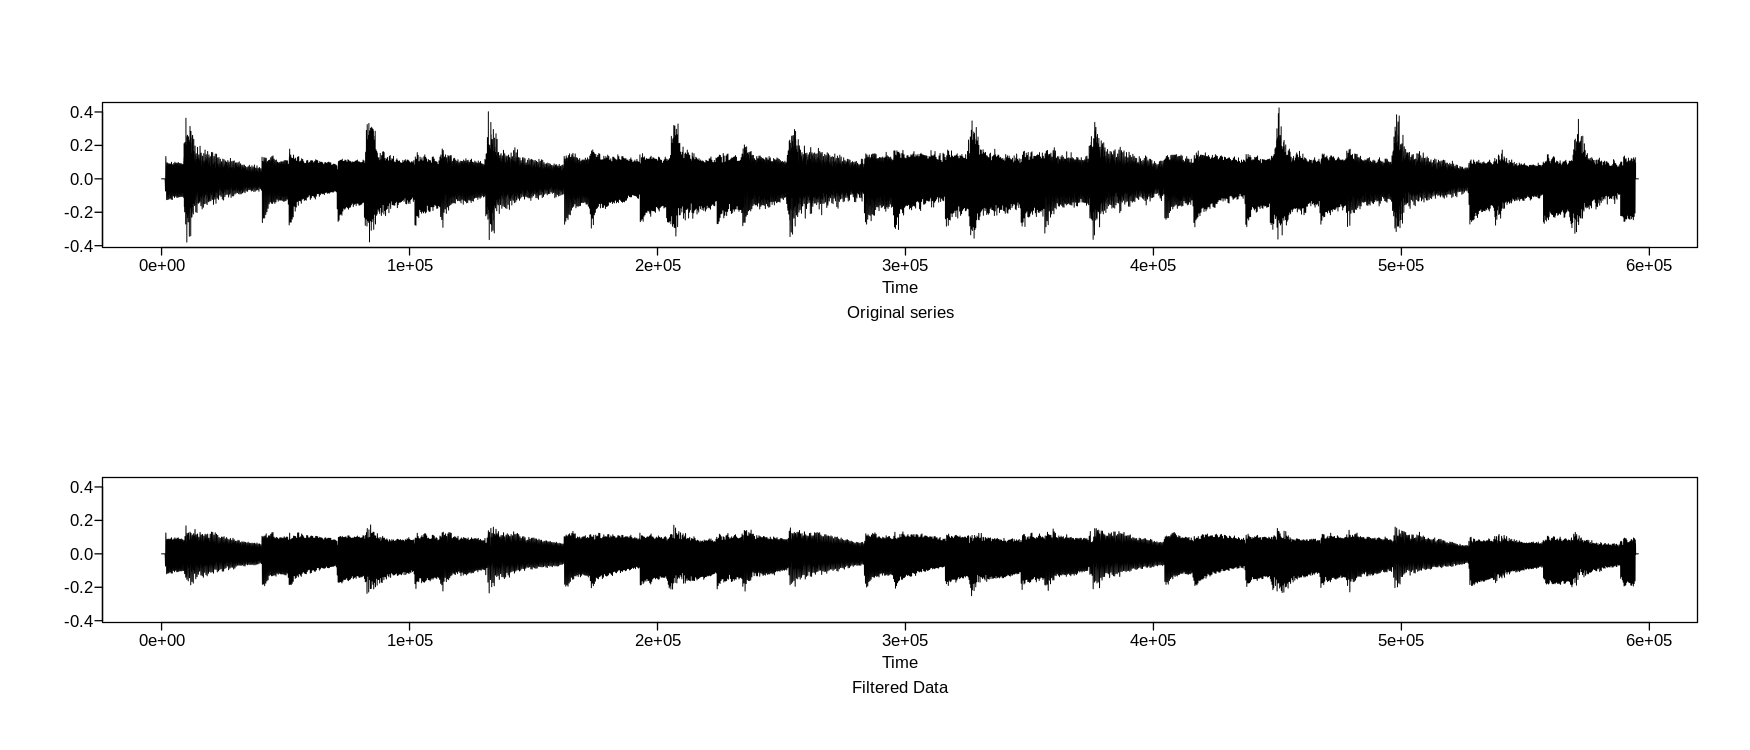

In [ ]:
low <- butterworth.wge(m1_2, order = 3, type = 'low', cutoff = .01)

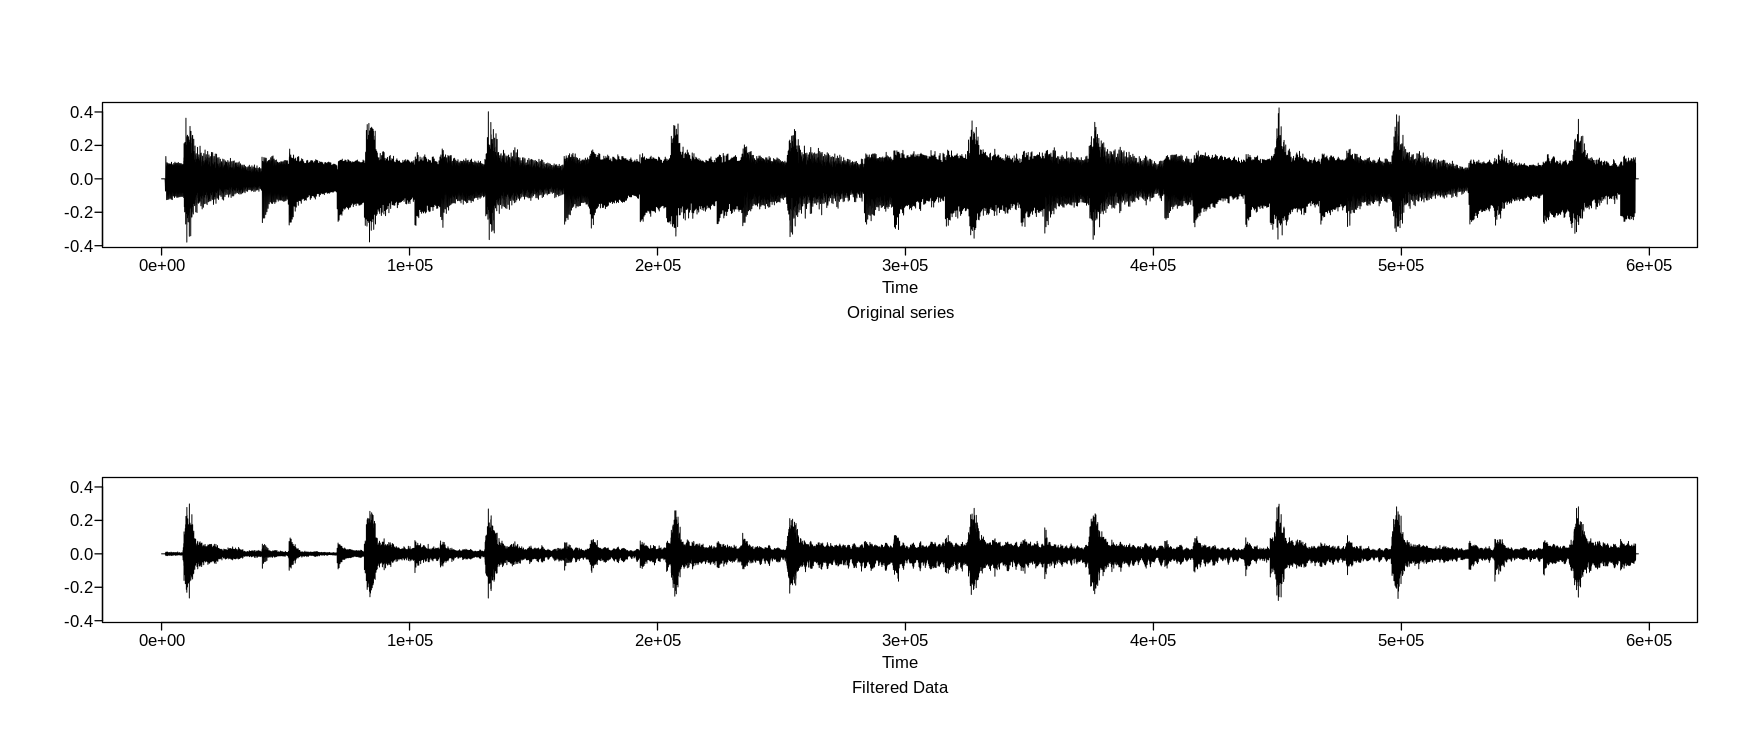

In [ ]:
high <- butterworth.wge(m1_2, order = 3, type = 'high', cutoff = .01)

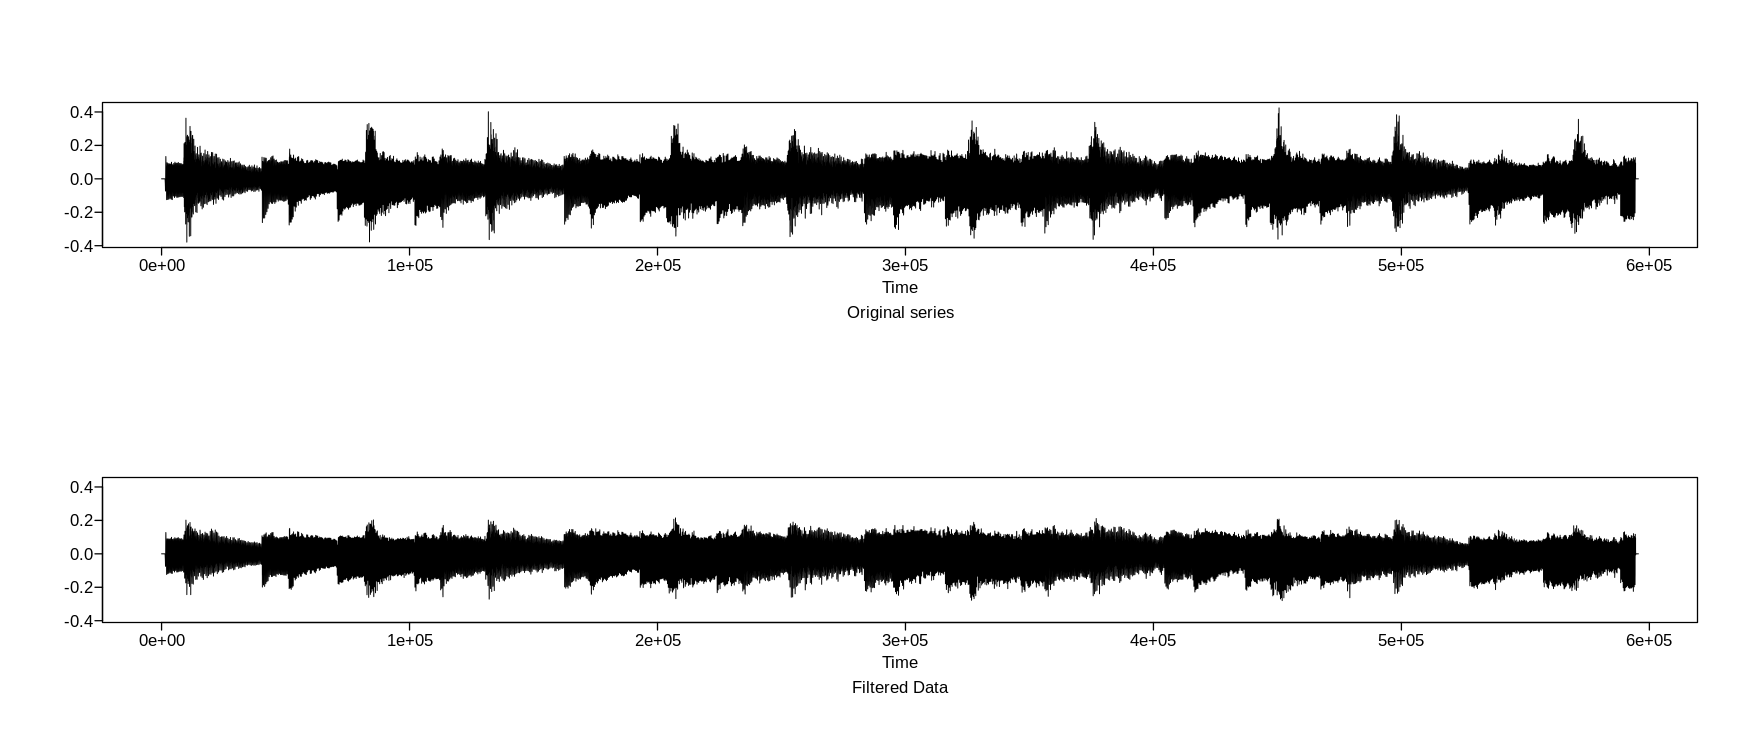

In [ ]:
stop <- butterworth.wge(m1_2, order = 3, type = 'stop', cutoff = c(.01, .03))

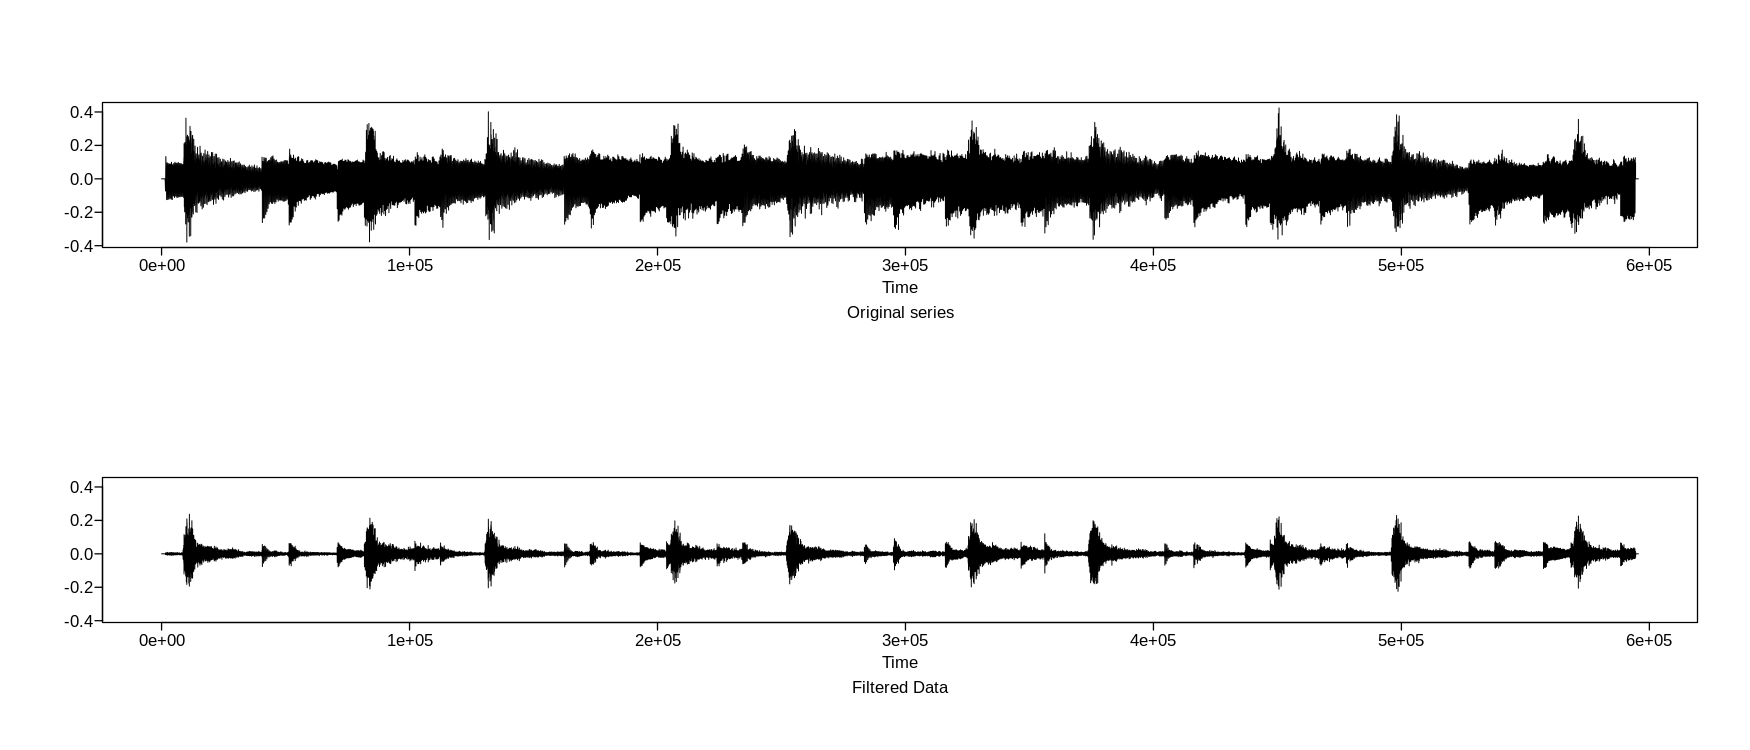

In [ ]:
pass <- butterworth.wge(m1_2, order = 3, type = 'pass', cutoff = c(.01, .03))

## Periodograms

Below, we utilize a Fourier Transform to analyze our time series data in the frequency domain. Doing so can provide meaningful information just through observing a visualization. With some additional calculations, inferences can be made about possibly periodicity; although, given the length of our music clips (15 seconds), there may not be useful information to be gathered about periodicity so it was not the focus of our analysis. We decided to downsample to a level that preserved the overall structure of the time series in order to speed up calculations. 

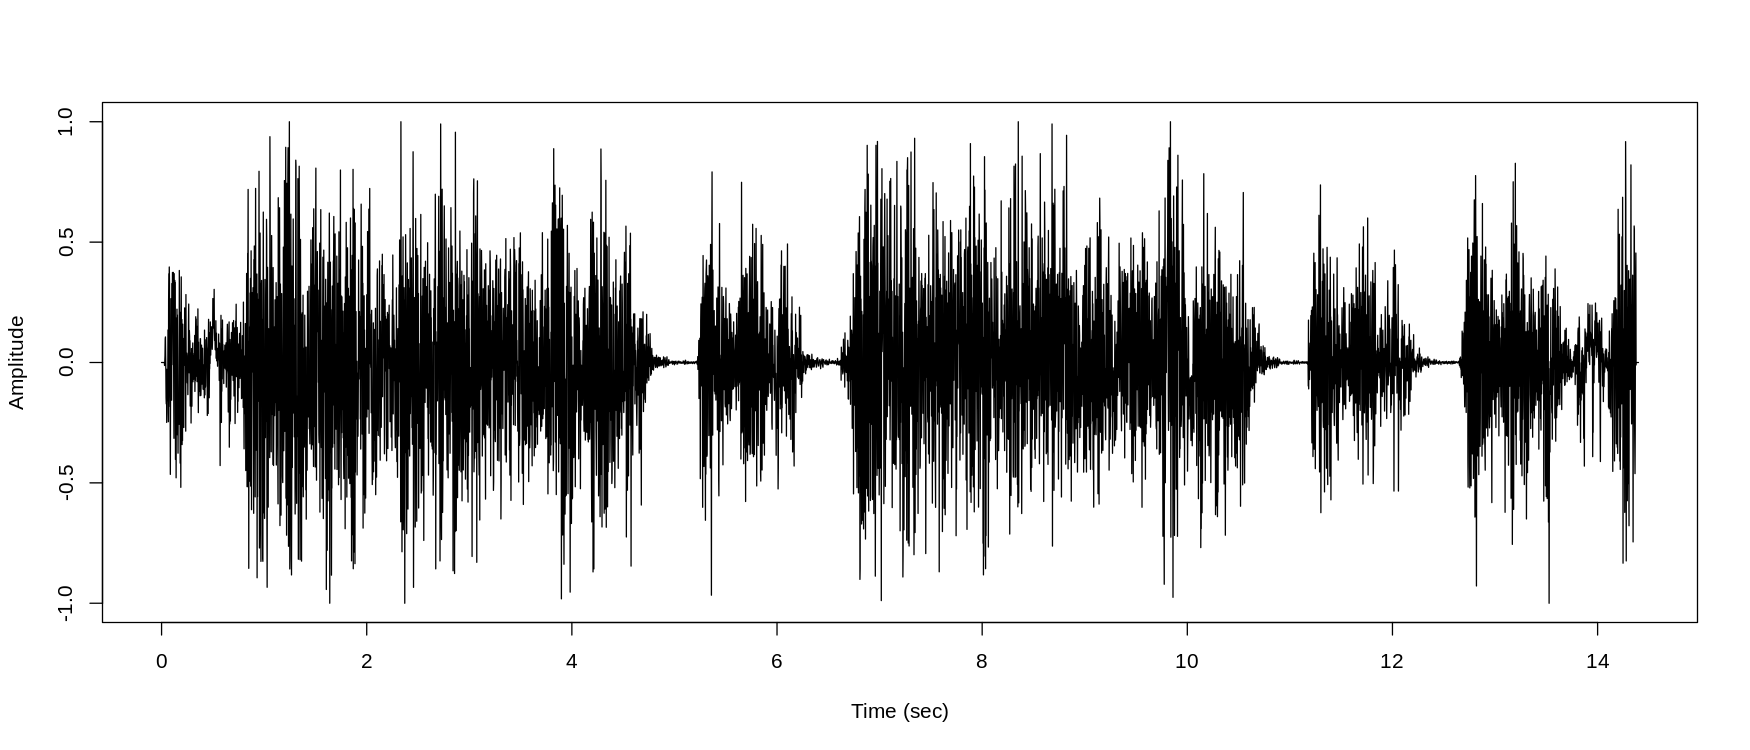

In [ ]:
# Downsampling by 1/100 the sampling rate
my.indx <- seq(1, (num_samples - 1), 100)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time[my.indx], m1[my.indx], type='l', col='black', xlab='Time (sec)', ylab='Amplitude')

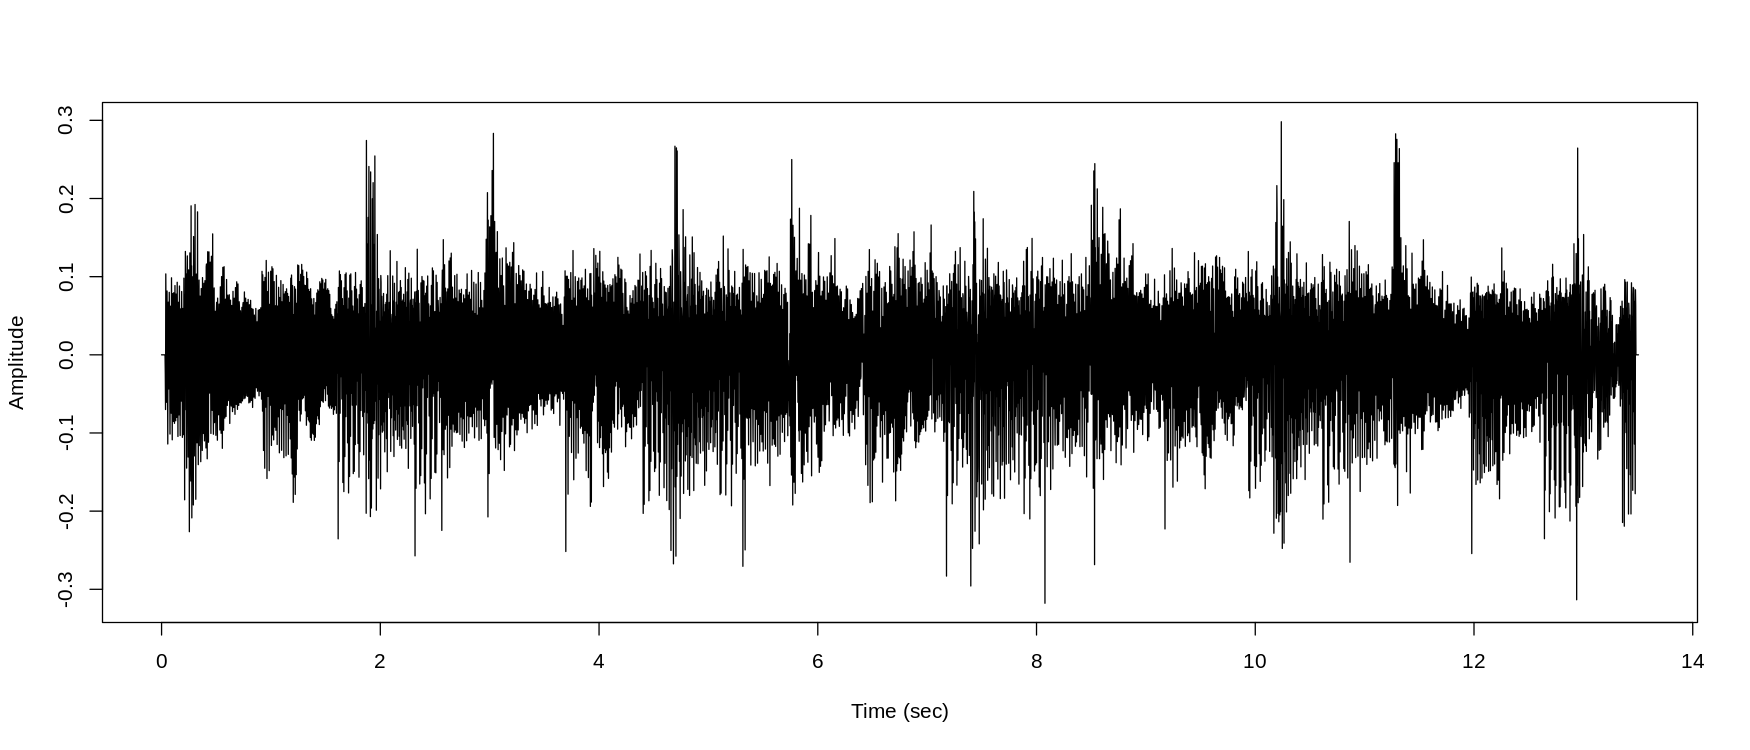

In [ ]:
# Downsampling by 1/100 the sampling rate
my.indx2 <- seq(1, (num_samples2 - 1), 100)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(my_time2[my.indx], m1_2[my.indx], type='l', col='black', xlab='Time (sec)', ylab='Amplitude')

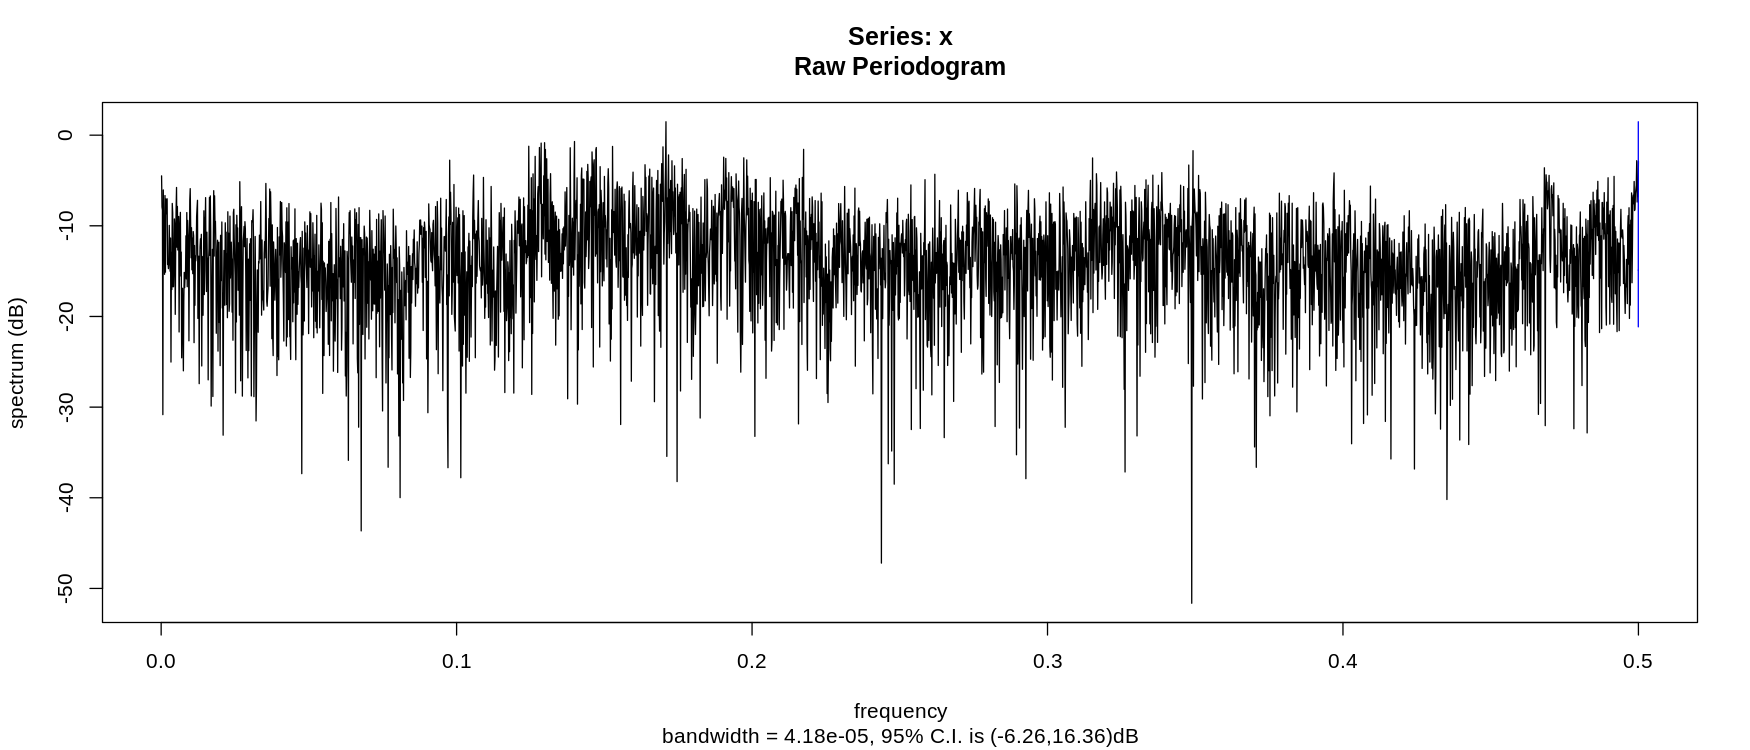

In [ ]:
# We Will Rock You -- Periodogram
spectrum(m1[my.indx], log="dB")

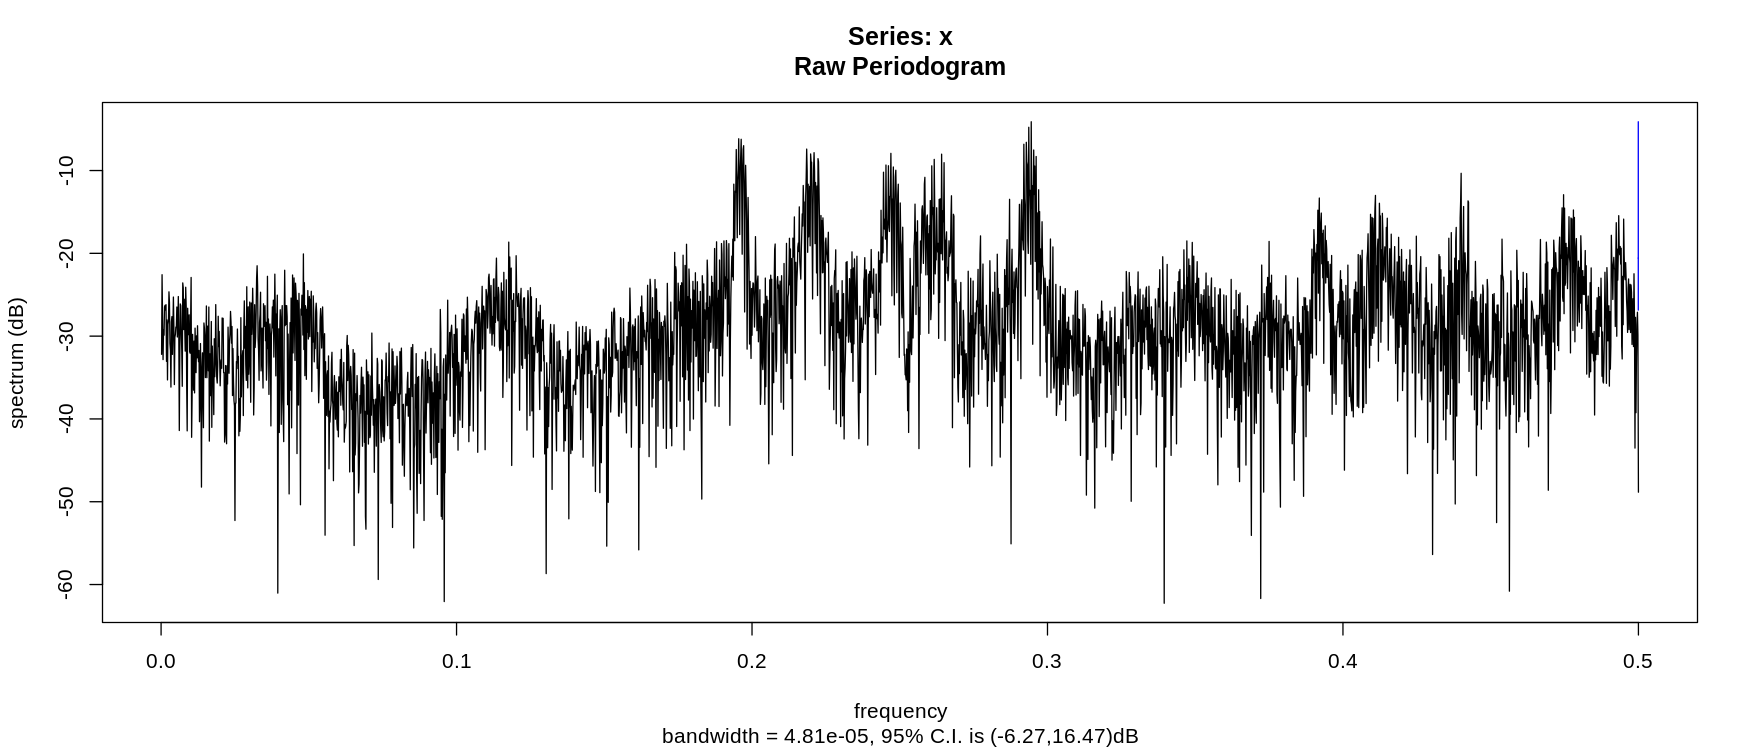

In [ ]:
# Baby's Tears Blues Periodogram
spectrum(m1_2[my.indx2], log="dB")

"We Will Rock You"

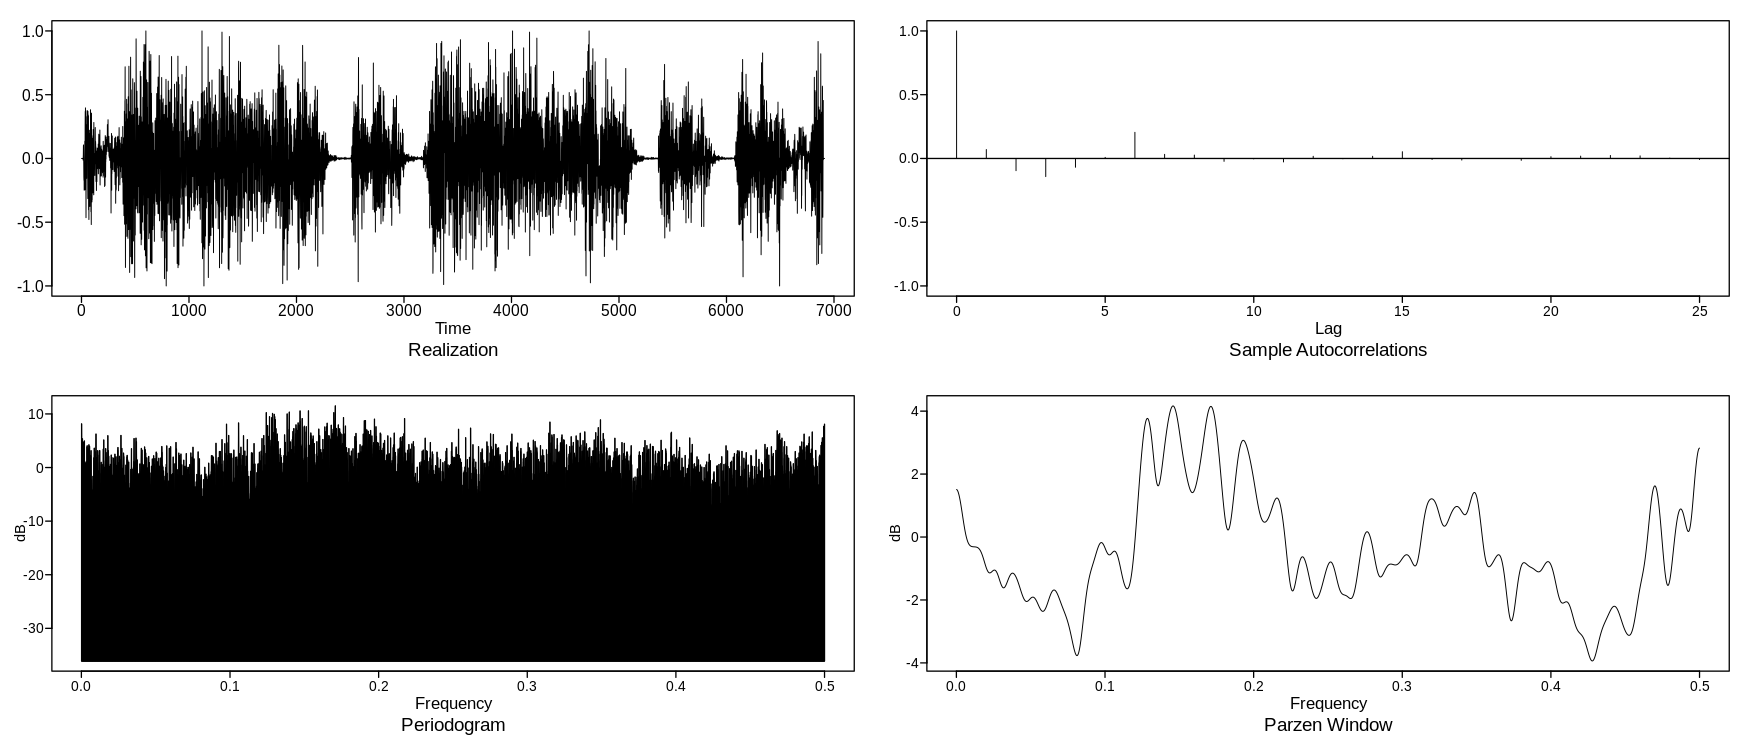

In [ ]:
pgram1 <- plotts.sample.wge(m1[my.indx])

"Baby's Tears Blues"

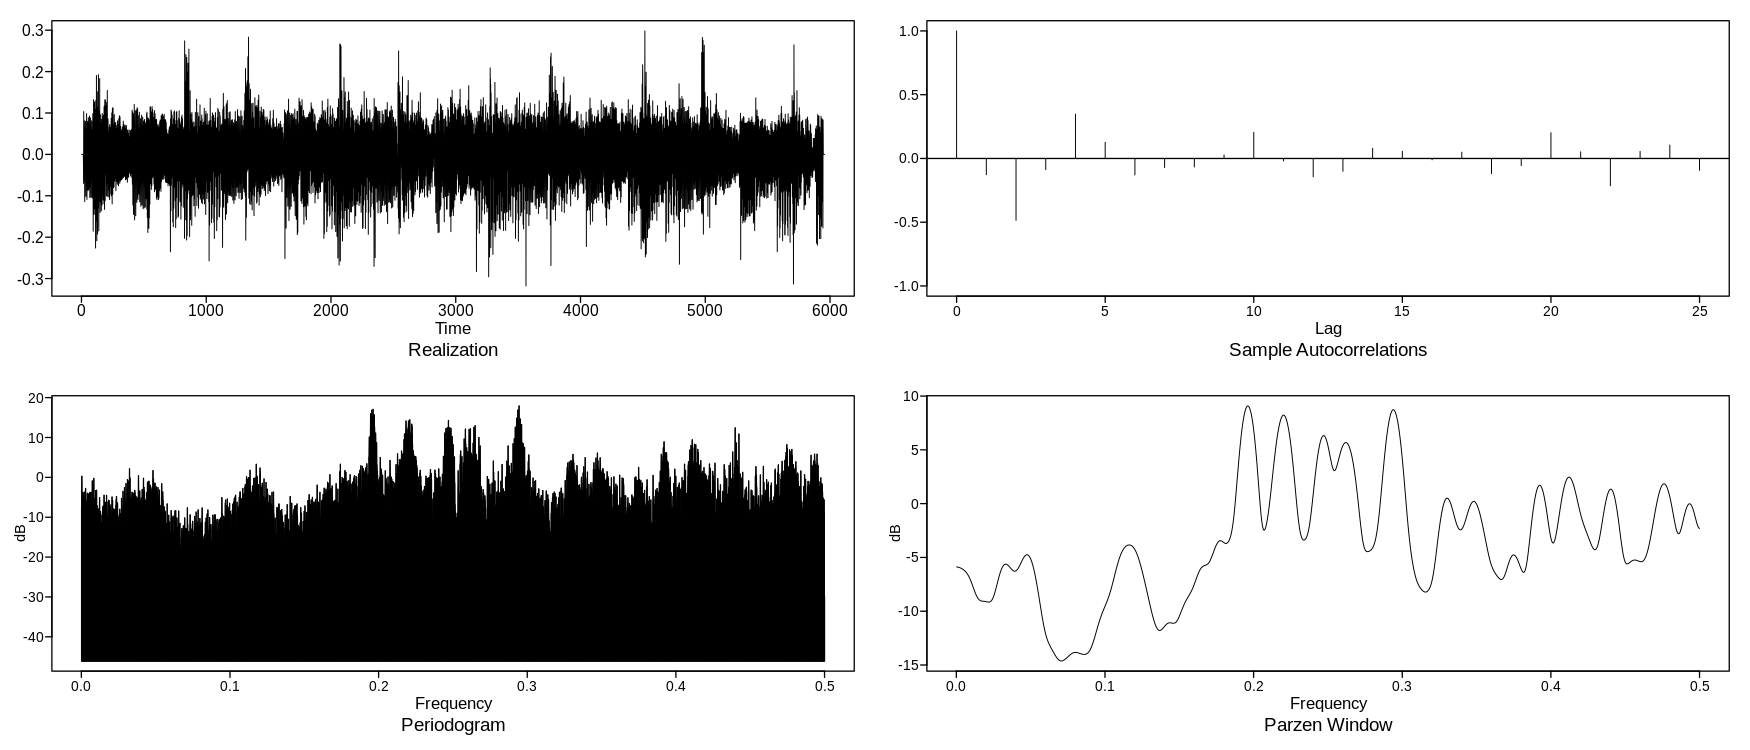

In [ ]:
pgram2 <- plotts.sample.wge(m1_2[my.indx2])

## Discussions

###We Will Rock You 

The choice in filters was an exploratory effort to experiment with the different types of filters we learned about in Applied Time Series Analysis. Thus, we ran each of the four filters while experimenting with different cutoff values. For the high-pass filter, we picked a cutoff value of .01 and observed that it filtered out stronger, louder, and higher amplitude data which was not particularly insightful. For the low-pass filter, we picked a cutoff value of .02 which filtered out some noise and appears to reveal a pattern between constant noise, a break, and a shorter period of noise, etc. This could potentially correspond to/represent a pattern in the song. For the bandstop filter we picked a cutoff band of .01 to .1. This reveals patterns in the data such as the repetition of a chorus or the occurrence of verses in the song. There are 12 “hubs” of noise as demonstrated by the plot, and in between there are periods of breaks in noise or decreased noise. These “hubs” could correspond to the verses of the song. Therefore, the bandstop filter was somewhat helpful in extracting information for analysis. For the bandpass filter, we picked a cutoff band of .01 to .1. This filter yielded similar results to the low-pass filter in terms of there being periods of noise followed by breaks. Ultimately, neither filter was too insightful. 

We picked a high pass filter with a cutoff equal to 0.1 in hopes of filtering the audio file down to the “base” layer. We observed that the frequencies in the periodogram of “We Will Rock You” were 0.1-0.2 in terms of dominant frequency, thus we originally picked a cutoff value of 0.2 which filtered out all of the data. Consequently, we decided on 0.1 instead which filtered most of the data, but left the “base” layer. We thought choosing a cutoff value equivalent to the dominant frequencies in the parzen window would yield the best results, but it did not work as anticipated. In future research, we would need to better understand how to precisely determine the cutoff values which would reveal meaningful analysis. 

In terms of downsampling, we used the R seq function to get separation of a factor of 100 to decrease the volume of data and reach a manageable level and we can see the same pattern of noise, break, shorter period of noise, break, etc. For the autocorrelation, there appears to be a correlation at lags of 1, 2, 3, 4, 5, and 6 seconds. For the parzen window, here are clear dominant frequencies between .15 and .2 corresponding to periods of about 5 to 6 seconds. There are also a few frequencies later which stand out around .32 and .48 corresponding to periods of about 2 to 3 seconds. 

###Baby’s Tears Blues 

For filtering, we employed a similar approach to “Baby’s Tears Blues” as “We Will Rock You” by applying the four filters we learned about in class. For the high-pass filter, we picked a cutoff value of .01 to elucidate the patterns in the data and filter out the noise. This was successful in visualizing ten spikes in noise & 20 smaller spikes in noise throughout the song. This may correspond to certain audio features in the music sample. This filter was effective in exhibiting potentially important pieces of information, but we would need more insight in order to better draw conclusions from the plots. For the low-pass filter, we picked a cutoff value of .01 which removed helpful data.  For the bandstop filter, we picked a cutoff band of .01 to .03 which was similar in effect as the low-pass filter in terms of it being unhelpful. For the bandpass filter, we picked a cutoff band of .01 to .03. This was similar to high-pass filters and isolated spikes, but the high-pass filter was more effective in isolating both the larger and smaller spikes. There are clearly 2-3 smaller spikes in between each of the bigger spikes. 

In terms of downsampling, we downsampled by 1/100 the sampling rate which isolated the spikes which appeared to be approximately 1-1.5 seconds apart (estimated by the plot). In terms of autocorrelation, there seems to be a sinusoidal pattern with correlation at the largest lags around 4.5, 5, 10, 12, 20, and 25. For the parzen Window, there are clear dominant frequencies between .2 and .3 corresponding to periods of about 3 to 5 seconds. There are also a few frequencies later which stand out around .33-.36 and around .4 corresponding to periods of around 2 to 3 seconds. 

###Comparison

In comparing amplitude, “We Will Rock You” exhibits a greater amplitude than “Baby’s Tears Blues,” as the scale for the y-axis which represents frequency for “We Will Rock You” ranges from -1.0 and 1.0 and occupies the entire space. In comparison, “Baby’s Tears Blues” ranges from -.4 and .4 which is a significantly smaller scale. Moreover, most of Baby’s Tears Blues is only between .15 or so and - .15, and there are occasional regular spikes in amplitude which nearly reach .4. Consequently, this reinforces that “We Will Rock You” is significantly louder than “Baby’s Tears Blues,” as supported by how the amplitude of a sound wave can be defined as the loudness. For Baby’s Tears Blues, there are repetitive consistent patterns in the amplitude (also visible by observing the plots). In comparison, “We Will Rock You” does not exhibit repetitive or consistent patterns in the amplitude. 

For “Baby's Tears Blues,” the more effective filters for revealing insightful information were the high-pass filter and the bandpass filter. In contrast, for “We Will Rock You,” the low-pass and bandstop filters were more effective. In other words, the filters which were less effective for one song were more effective for the other, and vica versa. This could possibly be related to how the songs themselves are starkly opposite, thus requiring different filters to effectively extract useful information (and avoid filtering out important data as well). 


###Challenges and Limitations in Project

Google Colab was a useful tool. However, we could not all work at the same time, so when we held group meetings, we had to trade off who had “mouse control.” This prevented us from operating at maximum efficiency. Ideally, eventually, there could be a way for us all to collaborate on different parts of the code at the same time. In retrospect, we wish we had done more research about the uses of Github and version control because it is possible this could have solved our issue. Google Colab was not able to play back audio or edit audio in certain ways. We tried using RStudio so we could use more advanced packages and functions but decided it was too difficult to coordinate using RStudio between three people with varying schedules. Colab was a better platform for collaboration. We had difficulty choosing cutoff and band values when applying the filters. Although we acquired some experience filtering over the course of the semester, we have plenty to learn about the proper use and application of filters. Prior to this project, we had little experience working with audio files as time series. Our lack of knowledge and experience was a limitation; hopefully in future projects we will be better prepared. The lack of existing literature on the topic was also a limitation. Our project was very exploratory, and as a result we could not come to a clear conclusion. There is much more investigation to be done.


###Conclusion and Future Directions 

We were not able to reach a definitive conclusion about how the two songs compare in efficacy for plant growth because, ultimately, to do this we would need to set up an experiment where plants actually “listened” to them and plant growth was measured. However, we were able to determine some differences between characteristics of the songs. There were consistent and steady patterns in Baby’s Tears Blues compared to We Will Rock You. Furthermore, the high amplitude values/fluctuations in We Will Rock You may not be the most conducive for creating a peaceful environment that stimulates plant growth. Baby’s Tears Blues seems to have constant patterns across the clip of music we selected which could potentially have beneficial impacts on plant growth due to its repetitive nature. There is no way to determine conclusive levels of efficacy without a controlled experiment; as a result, this project was predominantly exploratory to visualize the differences between the two songs and analyze them with methods used in time series. In the future, we would recommend setting up an experiment with plants and exposing them to each of the songs (or other songs with characteristics of interest) and monitoring and recording plant growth over time. 



## References

Davis, T. (Presenter). (2021, 4 12). Analyzing audio files. Lecture presented at College of William 
     and Mary, Williamsburg, VA, United States

Garson, M. (1976). Baby's Tears Blues [Recorded by Mort Garson]. On Mother Earth's Plantasia. Retrieved from https://open.spotify.com/track/2wK0lm2LveGjSRNKJabRca?si=ab7247907a9e43c9

Kojevnikov, Alexander. “Spek.” Spek, 0.8.2, 24 Feb. 2013, https://github.com/alexkay/spek#readme.

May, B. (1977) We Will Rock You [Recorded by Queen]. On Bohemian Rhapsody. Retrieved from https://we-will-rock-you.mp3quack.lol/

Paul, S. De. (2019, April 17). 'Mother Earth's Plantasia' is galactic album written for plants. The 
     Daily Californian. Retrieved May 16, 2021, from https://www.dailycal.org/2019/04/17/ 
     mother-earths-plantasia-is-galactic-album-written-solely-for-plants/ 

Pink, W. byA., &amp; Pink, A. (2021, February 4). Fact or Myth: Does Music Affect Plant Growth? Bloomscape. https://bloomscape.com/green-living/does-music-affect-plant-growth/. 



Samcarcagno. (2016, July 3). Basic Sound Processing with R. Sam Carcagno's Blog. http://samcarcagno.altervista.org/blog/basic-sound-processing-r/?doing_wp_cron=1611109150.8441030979156494140625.


Woodward, W., Gray, H., & Elliott, A. (2017). Applied time series analysis, with R (Second edition.). CRC Press, Taylor & Francis Group.

